In [1]:
import torch
import torch.nn as nn

In [2]:
def creating_data(n_samples=1000, data_std=0.1, seed=0):
    raw = [0,0,0,0,0,0]
    for i in range(6):
        raw[i] = torch.empty(n_samples,1,dtype=torch.float32).uniform_(-10,10)
    X = torch.cat([raw[0],raw[1],raw[2],raw[3],raw[4],raw[5]],dim=1)
    W_true = torch.tensor([
        [1],[3],[5],[4],[2],[6]
    ],dtype=torch.float32)
    a_true = torch.tensor(-3.0, dtype=torch.float32)
    noise = data_std * torch.randn(n_samples,1,dtype=torch.float32)

    y = X @ W_true + a_true + noise

    return X,y,W_true,a_true
    

In [3]:
X,y,W_true,a_true = creating_data(1000,0.2,0)

In [4]:
print(X[0:10])
print(y[:10])
print(W_true)
print(a_true)

tensor([[-1.7322,  4.6292,  2.5664, -2.0536,  7.3258,  3.3712],
        [-9.7105, -7.4648,  2.8791,  0.3325, -9.0947,  7.3473],
        [-3.3634,  9.8944,  2.3739, -7.1686, -8.4110, -2.1098],
        [-5.4730, -8.6629, -0.5669, -8.7850,  8.3822,  2.0019],
        [ 6.5930, -7.1220,  9.8924,  1.1826,  5.4956,  4.9923],
        [-8.7489, -2.2703,  9.3143, -0.4640, -6.5146,  0.1440],
        [-0.3277,  7.4507, -9.0712, -5.0512,  5.2998, -9.0035],
        [-9.8009, -0.6801, -8.8293,  4.4266,  2.9781, -6.5830],
        [ 1.3940, -6.4027, -5.3236,  6.9633, -8.6340, -8.4511],
        [-5.0331, -2.4027,  3.9432,  6.9993,  0.2483, -9.3417]])
tensor([[ 48.2729],
        [  6.4512],
        [-23.0511],
        [-43.5498],
        [ 77.3405],
        [ 13.9928],
        [-89.7662],
        [-74.8161],
        [-87.6273],
        [-22.9808]])
tensor([[1.],
        [3.],
        [5.],
        [4.],
        [2.],
        [6.]])
tensor(-3.)


In [5]:
import matplotlib.pyplot as plt


In [6]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(6,1,dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1,dtype=torch.float32), requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x @ self.weights + self.bias # Linear Regression: y = x.W + bias


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())   # trả về numpy
X_scaled = torch.from_numpy(X_scaled).float()


In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X_scaled[:train_split], y[:train_split]
X_test, y_test = X_scaled[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [9]:
torch.manual_seed(3)

model_1 = LinearRegression()

list(model_1.parameters())

[Parameter containing:
 tensor([[0.0043],
         [0.1056],
         [0.2858],
         [0.0270],
         [0.4716],
         [0.0601]], requires_grad=True),
 Parameter containing:
 tensor([0.7719], requires_grad=True)]

In [10]:
loss_fn = nn.MSELoss()

In [12]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

# PyTorch training loop

For the training loop, we'll build the following steps:

| Number | Step name             | What does it do? | Code example |
|--------|-----------------------|------------------|--------------|
| 1 | **Forward pass** | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | **Calculate the loss** | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | **Zero gradients** | The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | **Perform backpropagation on the loss** | Computes the gradient of the loss with respect to every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards". | `loss.backward()` |
| 5 | **Update the optimizer (gradient descent)** | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |


In [33]:
torch.manual_seed(42)
train_loss_values = []
test_loss_values = []
epoch_count = []
epochs = 200
for i in range(epochs):
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
      test_pred = model_1(X_test)

      test_loss = loss_fn(test_pred, y_test.type(torch.float)) 

      if i % 10 == 0:
            epoch_count.append(i)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {i} | MSE Train Loss: {loss} | MSE Test Loss: {test_loss} ")

Epoch: 0 | MSE Train Loss: 1.912325382232666 | MSE Test Loss: 2.0729782581329346 
Epoch: 10 | MSE Train Loss: 1.3474268913269043 | MSE Test Loss: 1.4618072509765625 
Epoch: 20 | MSE Train Loss: 0.9533193111419678 | MSE Test Loss: 1.0347626209259033 
Epoch: 30 | MSE Train Loss: 0.6782476305961609 | MSE Test Loss: 0.7363012433052063 
Epoch: 40 | MSE Train Loss: 0.4861971139907837 | MSE Test Loss: 0.5276666283607483 
Epoch: 50 | MSE Train Loss: 0.35206225514411926 | MSE Test Loss: 0.3818090558052063 
Epoch: 60 | MSE Train Loss: 0.2583540976047516 | MSE Test Loss: 0.2798275053501129 
Epoch: 70 | MSE Train Loss: 0.19286154210567474 | MSE Test Loss: 0.20851844549179077 
Epoch: 80 | MSE Train Loss: 0.1470765918493271 | MSE Test Loss: 0.15865126252174377 
Epoch: 90 | MSE Train Loss: 0.11506009846925735 | MSE Test Loss: 0.12378513067960739 
Epoch: 100 | MSE Train Loss: 0.09266813099384308 | MSE Test Loss: 0.0994102954864502 
Epoch: 110 | MSE Train Loss: 0.07699932157993317 | MSE Test Loss: 0.08

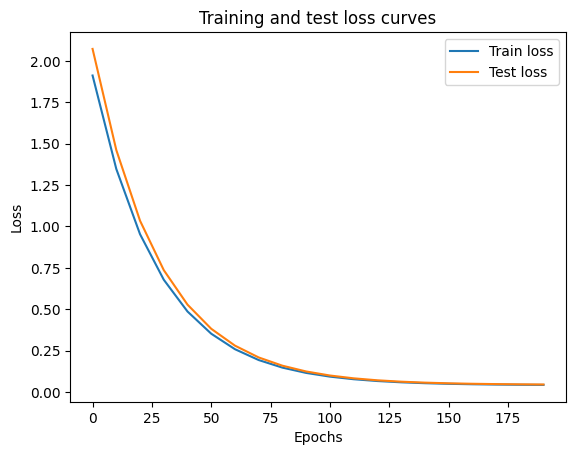

In [34]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [35]:
def plot_feature1_with_prediction(X_train, y_train, X_test, y_test, y_pred_test):
    X_train_f1 = to_numpy(X_train)[:, 0]
    X_test_f1  = to_numpy(X_test)[:, 0]

    y_train = to_numpy(y_train).ravel()  # <--- THÊM .ravel()
    y_test  = to_numpy(y_test).ravel()
    y_pred_test = to_numpy(y_pred_test).ravel()

    plt.scatter(X_train_f1, y_train, label='Train data', alpha=0.6)
    plt.scatter(X_test_f1, y_test, label='Test data', alpha=0.6)
    plt.scatter(X_test_f1, y_pred_test, label='Prediction', marker='x', s=80)

    coeffs = np.polyfit(X_train_f1, y_train, 1)
    line = np.poly1d(coeffs)

    x_line = np.linspace(
        min(X_train_f1.min(), X_test_f1.min()),
        max(X_train_f1.max(), X_test_f1.max()), 100
    )
    y_line = line(x_line)
    plt.plot(x_line, y_line, label='Linear Regression Fit', linewidth=2)

    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()
    plt.title('Train/Test Scatter + Prediction + Linear Regression Line')
    plt.show()




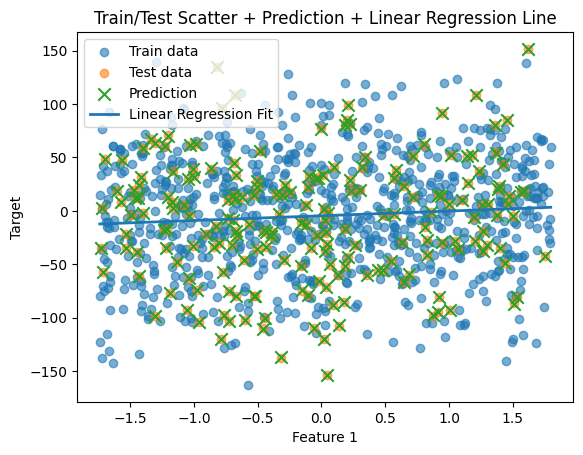

In [36]:
# dự đoán trên test
y_pred_test = model_1(X_test)

# vẽ
plot_feature1_with_prediction(X_train, y_train, X_test, y_test, y_pred_test)

In [37]:
print(model_1.state_dict())

OrderedDict([('weights', tensor([[ 5.6528],
        [17.0874],
        [29.5214],
        [23.5002],
        [11.5267],
        [34.8946]])), ('bias', tensor([-5.3583]))])


In [38]:
mean = X.mean(dim=0)
std  = X.std(dim=0)

W_learned = model_1.state_dict()["weights"].detach().squeeze()  # [n_features]
b_learned = model_1.state_dict()["bias"].detach().squeeze()     # scalar


In [39]:
def recover_weights(W_learned, b_learned, mean, std):
    W_orig = W_learned / std
    a_orig = b_learned - (mean / std) @ W_learned
    return W_orig, a_orig


In [40]:
W_orig, a_orig = recover_weights(W_learned, b_learned, mean, std)
print("Recovered W:", W_orig)
print("Recovered bias:", a_orig)


Recovered W: tensor([0.9991, 2.9951, 4.9926, 3.9962, 1.9945, 5.9933])
Recovered bias: tensor(-2.9910)


In [41]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), 
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1.pth
